# Sparse Hebbian Learning: basics

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run setup.py --description

 This is a collection of python scripts to test learning strategies to efficiently code natural image patches.  This is here restricted  to the framework of the [SparseNet algorithm from Bruno Olshausen](http://redwood.berkeley.edu/bruno/sparsenet/).


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

In [4]:
from shl_scripts import SHL
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 10, 10


In [5]:
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, learning_algorithm='omp', verbose=verbose, eta=.1, n_image=10, n_iter=100)
data = shl.get_data(name_database='serre07_distractors')

Extracting data...Fdn_open13.jpg, Mdn_N295008.jpg, Fdn_natu176.jpg, Mda_art1517.jpg, Fdn_natu79.jpg, Hda_int314.jpg, Hdn_objn202.jpg, Hdn_objn213.jpg, Fda_urb342.jpg, Fdn_text69.jpg, 
Data is of shape : (1000, 144)done in 0.39s.

In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean())
print('average energy of patches = ', data.std(axis=0).mean())
print('std of the average of individual patches = ', data.mean(axis=0).std())

number of patches, size of patches =  (1000, 144)
average of patches =  1.43095412063e-18
average energy of patches =  1.0
std of the average of individual patches =  1.2810497775e-17


Extracting data...Mda_art242.jpg, Hda_int536.jpg, Mdn_for35.jpg, Hdn_objn80.jpg, Bdn_nat331.jpg, Fdn_sclos2.jpg, Bda_art145.jpg, Mda_archi422.jpg, Mda_archi303.jpg, Hda_obj76.jpg, 
Data is of shape : (1000, 144)done in 0.35s.Learning the dictionary... Training on 1000 patches... Iteration   0 /   10 (elapsed time:   0s,  0.0mn)
Norm  1.0 1.0 54
Gain  1.0 1.0 0
Iteration   1 /   10 (elapsed time:   1s,  0.0mn)
Norm  0.996856259751 1.05062153486 142
Gain  0.999973652066 1.00009934907 181
Iteration   2 /   10 (elapsed time:   3s,  0.1mn)
Norm  0.99638288274 1.04403753145 98
Gain  0.999950133827 1.00016017484 180
Iteration   3 /   10 (elapsed time:   5s,  0.1mn)
Norm  0.99036314169 1.05107801214 85
Gain  0.999919560897 1.00030602505 77
Iteration   4 /   10 (elapsed time:   7s,  0.1mn)
Norm  0.998083210735 1.06324496337 73
Gain  0.999891676402 1.00046425243 180
Iteration   5 /   10 (elapsed time:   9s,  0.2mn)
Norm  0.997798908563 1.07933182033 15
Ga

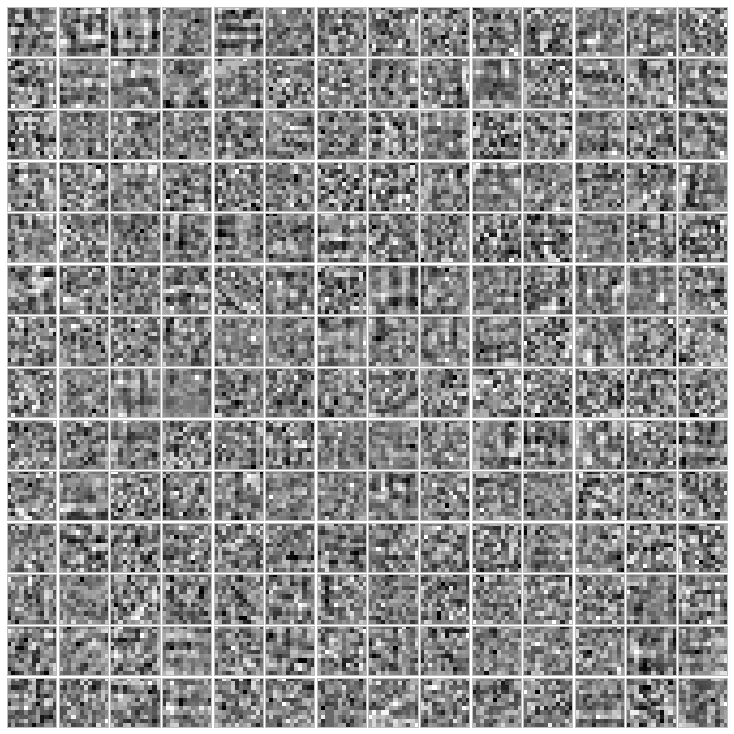

In [7]:
dico = shl.learn_dico()
_ = shl.show_dico(dico)
patches = shl.code(data, dico)

In [8]:
print('number of patches, size of patches = ', patches.shape)
print('average of patches = ', patches.mean())
print('average energy of patches = ', patches.std(axis=0).mean())
print('std of the average of individual patches = ', patches.mean(axis=0).std())

number of patches, size of patches =  (1000, 144)
average of patches =  0.00121690327719
average energy of patches =  0.71764464159
std of the average of individual patches =  0.0110076706872


In [9]:
code = dico.transform(data)
print('number of patches, size of patches = ', code.shape)
print('average of patches = ', code.mean())
print('average energy of patches = ', code.std(axis=0).mean())
print('std of the average of individual patches = ', code.mean(axis=0).std())

number of patches, size of patches =  (1000, 196)
average of patches =  -0.000936224264451
average energy of patches =  0.570153324487
std of the average of individual patches =  0.0148448779694


In [10]:
V = dico.components_
print(code[0,:])
patches = np.dot(code, V)
print(data[0,:], patches[0,:])

[ 0.      0.      0.      0.      0.2335  0.      0.      0.      0.      0.
  0.      0.      0.279   0.      0.      0.     -0.2605  0.      0.      0.
  0.      0.      0.     -0.5709  0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.     -0.2389  0.      0.
  0.      0.      0.2295  0.      0.      0.      0.      0.      0.      0.
  0.3346  0.1789  0.      0.      0.      0.      0.      0.1824  0.      0.
  0.     -0.2     0.     -0.2306  0.      0.      0.      0.      0.      0.
  0.3784  0.      0.      0.      0.      0.     -0.1953  0.      0.      0.
  0.      0.      0.2991  0.      0.      0.      0.      0.      0.      0.
  0.3651  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.     -0.1696 -0.1886  0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.

In [11]:
error = data - patches
print('number of patches, size of patches = ', error.shape)
print('average of patches = ', error.mean())
print('average energy of patches = ', error.std(axis=0).mean())
print('std of the average of individual patches = ', error.mean(axis=0).std())

number of patches, size of patches =  (1000, 144)
average of patches =  -0.00121690327719
average energy of patches =  0.606267001171
std of the average of individual patches =  0.0110076706872


## Version used

In [12]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy

Installed version_information.py. To use it, type:
  %load_ext version_information


Software versions
Python 3.5.0 64bit [GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
IPython 4.0.0
OS Darwin 15.0.0 x86_64 i386 64bit
numpy 1.10.1
Wed Oct 21 12:19:47 2015 CEST